In [163]:
import os
import cv2
import numpy as np              
import pandas as pd      
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.layers import Dropout
from keras.models import load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [160]:
# giving the path of the data

# for train data
train_path = './dices'
# for test data 
test_path = './dice_test'

batch_size = 16 

img_width = 128
img_height = 128


In [137]:
# Image Data Generator for train set
img_gen = ImageDataGenerator(
         rescale=1./255,
         shear_range=0.2,
         zoom_range=0.2,
         horizontal_flip=True )

# Image Data Generator for test set
test_img_gen = ImageDataGenerator(rescale = 1./255)

In [138]:
# Apply the Image Data Generator for train set
train = img_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )

# Apply the Image Data Generator for test set
test = test_img_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False, 
      class_mode='binary',
      batch_size=batch_size
      )


Found 3809 images belonging to 2 classes.
Found 382 images belonging to 2 classes.


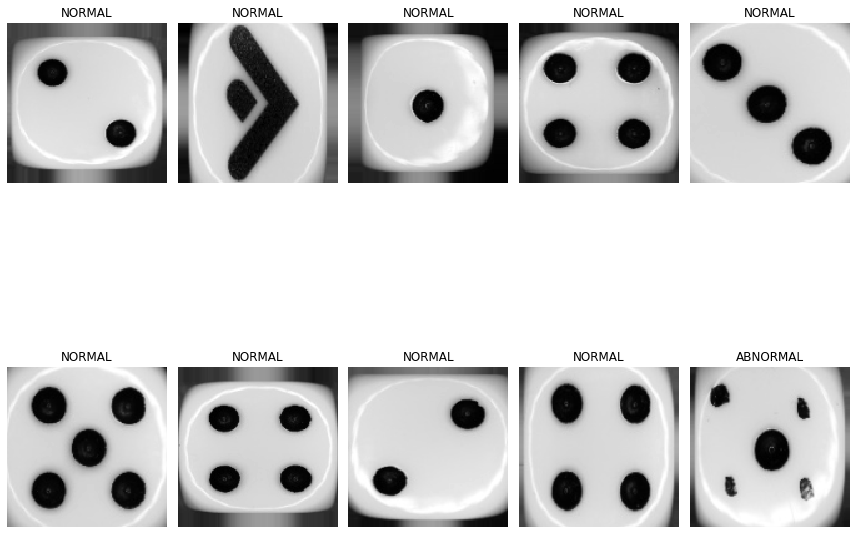

In [141]:
plt.figure(figsize=(12, 12))

for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        dic = {0:'ABNORMAL', 1:'NORMAL'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()


In [169]:
# CNN model with Squential
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3),padding="valid", activation="relu",kernel_regularizer=l2(0.0005), input_shape=(img_width, img_height, 1)))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(32, (3, 3),padding="valid", activation="relu", input_shape=(img_width, img_height, 1)))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(32, (3, 3),padding="valid", activation="relu", input_shape=(img_width, img_height, 1)))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(64, (3, 3),padding="valid", activation="relu", input_shape=(img_width, img_height, 1)))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(64, (3, 3), padding="valid",activation="relu", input_shape=(img_width, img_height, 1)))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())
    model.add(Dense(activation = 'relu', units = 128))
    model.add(Dropout(0.5))

    model.add(Dense(activation = 'relu', units = 64))
    model.add(Dense(activation = 'sigmoid', units = 1))
    
    opt = Adam(lr=0.000001)
    model.compile(optimizer = opt ,loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model


In [170]:
# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 14, 14, 32)      

/Users/yusufakcakaya/opt/anaconda3/envs/tf/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [171]:
#save the model
checkpoint_path = "model_cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# create callbacks with check point
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True, monitor='val_loss')]


In [172]:
#start to model fitting
history = model.fit(train, epochs = 25 , validation_data = test, callbacks = callbacks)


Epoch 1/25
239/239 [==============================] - 23s 95ms/step - loss: 0.6904 - accuracy: 0.6653 - val_loss: 0.6852 - val_accuracy: 0.8639
Epoch 2/25
239/239 [==============================] - 27s 111ms/step - loss: 0.6823 - accuracy: 0.8669 - val_loss: 0.6778 - val_accuracy: 0.8639
Epoch 3/25
239/239 [==============================] - 24s 98ms/step - loss: 0.6745 - accuracy: 0.8916 - val_loss: 0.6702 - val_accuracy: 0.8639
Epoch 4/25
239/239 [==============================] - 23s 96ms/step - loss: 0.6656 - accuracy: 0.8929 - val_loss: 0.6611 - val_accuracy: 0.8639
Epoch 5/25
239/239 [==============================] - 23s 96ms/step - loss: 0.6550 - accuracy: 0.8929 - val_loss: 0.6494 - val_accuracy: 0.8639
Epoch 6/25
239/239 [==============================] - 25s 106ms/step - loss: 0.6403 - accuracy: 0.8931 - val_loss: 0.6341 - val_accuracy: 0.8639
Epoch 7/25
239/239 [==============================] - 27s 112ms/step - loss: 0.6221 - accuracy: 0.8931 - val_loss: 0.6147 - val_accura

<AxesSubplot:>

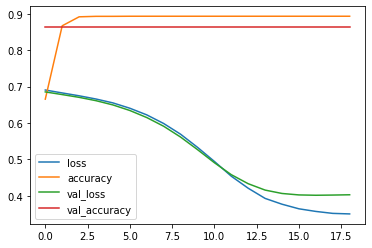

In [173]:
# Plot the model
pd.DataFrame(history.history).plot()


In [174]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'model_cp.ckpt'

In [175]:
# Re-evaluate the model
loss, acc = model.evaluate(test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

24/24 - 0s - loss: 0.4025 - accuracy: 0.8639 - 429ms/epoch - 18ms/step
Restored model, accuracy: 86.39%


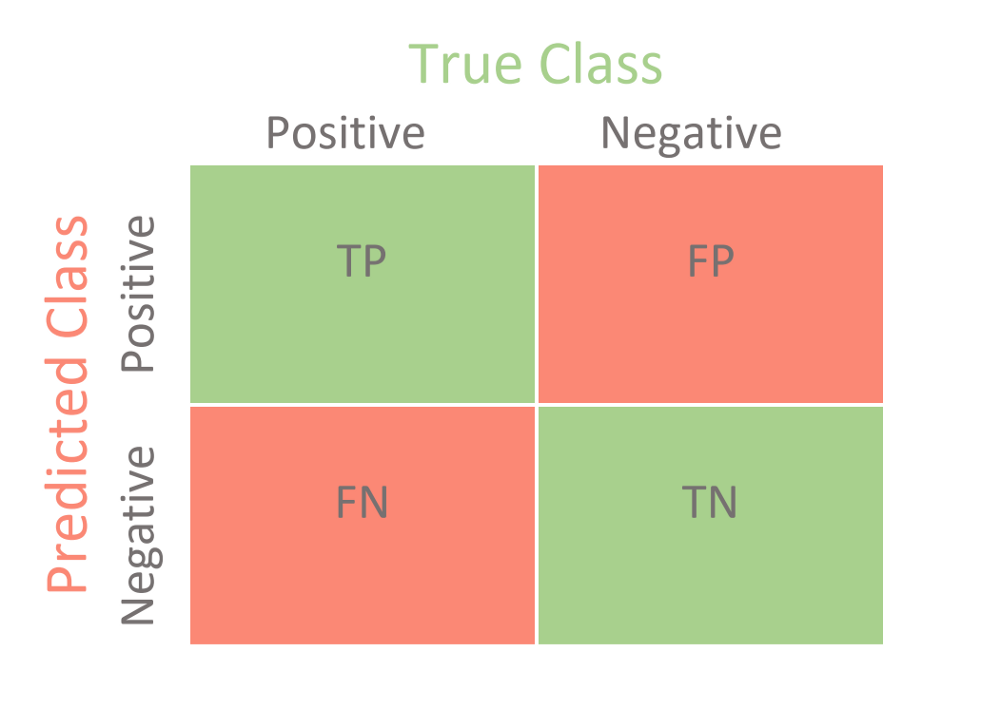



- Precision = TruePositives / (TruePositives + FalsePositives)
- Recall = TruePositives / (TruePositives + FalseNegatives)
- F1 = (2 * Precision * Recall) / (Precision + Recall)

In [176]:

print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['Abnormal','Normal']))

              precision    recall  f1-score   support

    Abnormal       0.00      0.00      0.00        52
      Normal       0.86      1.00      0.93       330

    accuracy                           0.86       382
   macro avg       0.43      0.50      0.46       382
weighted avg       0.75      0.86      0.80       382



/Users/yusufakcakaya/opt/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yusufakcakaya/opt/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yusufakcakaya/opt/anaconda3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [177]:
prediction_path = './prediction'


In [178]:
def predict(path):
    img = image.load_img(path, target_size=(128, 128),color_mode='grayscale')
    
    # Preprocessing the image
    pp_img = image.img_to_array(img)
    pp_img = pp_img/255
    pp_img = np.expand_dims(pp_img, axis=0)
    
    
    #predict
    img_pred= model.predict(pp_img)
    
    plt.figure(figsize=(6,6))
    plt.axis('off')
    
    if img_pred >= 0.5: 
        pred = ('Normal with {:%} percent'.format(img_pred[0][0]))
    
    else: 
        pred = ('Abnormal with {:%} percent'.format(1-img_pred[0][0]))
        
    plt.title("Detection\n"+ pred)  

    plt.imshow(np.squeeze(pp_img))
    
    return  plt.show()


In [181]:
path = './dices/normal/26_01_22_10_106.png'

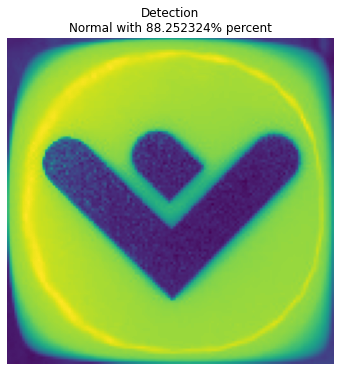

In [182]:
predict(path)

There are three main approaches which are suggested each having its pros and cons:

- **Undersampling**- Randomly delete the class which has sufficient observations so that the comparative ratio of two classes is significant in our data.Although this approach is really simple to follow but there is a high possibility that the data that we are deleting may contain important information about the predictive class.

- **Oversampling**-For the unbalanced class randomly increase the number of observations which are just copies of existing samples.This ideally gives us sufficient number of samples to play with.The oversampling may lead to overfitting to the training data
- **Synthetic sampling(SMOTE)**-The technique asks to synthetically manufacture observations of unbalanced classes which are similar to the existing using nearest neighbors classification.The problem is what to do when the number of observations of is an extremely rare class .For example-we may have only one picture of a rare species which we want to identify using image classification algorithm

Applying regularization helps you to:

**Reduce the effects of overfitting**
**Increase the ability of your model to generalize**

When working with large datasets and deep neural networks applying regularization is typically a must.

Normally you’ll encounter either L1 or L2 regularization being applied — I will use L2 regularization on my networks if I detect signs of overfitting:

EarlyStopping is another method to avoid overfitting

